In [4]:
import pandas as pd
import sys
sys.path.insert(0, '/home/aibo/aa/aa4')
from utils import process, extract_style
from pandarallel import pandarallel
pandarallel.initialize()

INFO: Pandarallel will run on 48 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [6]:
df = pd.read_csv('turing_AA_train_test_ab.csv')

In [7]:
len(df)

149561

In [3]:
authors = ['human', 'ctrl', 'fair_wmt19', 'fair_wmt20', 'gpt1', 'gpt2_large', 'gpt2_medium', 'gpt2_pytorch', 'gpt2_small', 'gpt2_xl', 'gpt3', 'grover_base', 'grover_large', 'grover_mega', 'pplm_distil', 'pplm_gpt2', 'transfo_xl', 'xlm', 'xlnet_base', 'xlnet_large']
authors_mapping = {}
for auth in authors:
    authors_mapping[auth] = len(authors_mapping)
authors_mapping

{'human': 0,
 'ctrl': 1,
 'fair_wmt19': 2,
 'fair_wmt20': 3,
 'gpt1': 4,
 'gpt2_large': 5,
 'gpt2_medium': 6,
 'gpt2_pytorch': 7,
 'gpt2_small': 8,
 'gpt2_xl': 9,
 'gpt3': 10,
 'grover_base': 11,
 'grover_large': 12,
 'grover_mega': 13,
 'pplm_distil': 14,
 'pplm_gpt2': 15,
 'transfo_xl': 16,
 'xlm': 17,
 'xlnet_base': 18,
 'xlnet_large': 19}

In [4]:
splits = ['train', 'test']
processed_df = []

for split_name in splits:
    df = pd.read_csv(f'TuringBench/AA/{split_name}.csv')
    df['From'] = df['label'].parallel_apply(lambda x: authors_mapping[x])
    df['train'] = 1 if split_name == 'train' else 0
    df['author'] = df['label']
    df['content'] = df['Generation']

    df['content_tfidf'] = df['content'].parallel_apply(lambda x: process(x))
    df[["avg_len", "len_text", "len_words", "num_short_w", "per_digit", "per_cap", "f_a", "f_b", "f_c", "f_d",
        "f_e", "f_f", "f_g", "f_h", "f_i", "f_j", "f_k", "f_l", "f_m", "f_n", "f_o", "f_p", "f_q", "f_r", "f_s",
        "f_t", "f_u", "f_v", "f_w", "f_x", "f_y", "f_z", "f_0", "f_1", "f_2", "f_3", "f_4", "f_5", "f_6", "f_7",
        "f_8", "f_9", "f_e_0", "f_e_1", "f_e_2", "f_e_3", "f_e_4", "f_e_5", "f_e_6", "f_e_7", "f_e_8", "f_e_9",
        "f_e_10", "f_e_11", "richness"]] = df['content'].parallel_apply(lambda x: extract_style(x))

    df = df.sort_values(by=['From'])
    processed_df.append(df)

In [8]:
processed_df[0]

,Generation,label,From,train,author,content,content_tfidf,avg_len,len_text,len_words,...,f_e_3,f_e_4,f_e_5,f_e_6,f_e_7,f_e_8,f_e_9,f_e_10,f_e_11,richness
63779,a facebook writer who hates donald trump is ta...,human,0,1,human,a facebook writer who hates donald trump is ta...,facebook writer hate donald trump take credit ...,5.524390,1604.0,246.0,...,0.000000,0.013092,0.014339,0.000000,0.008728,0.000000,0.000000,0.000000,0.000000,0.987805
26681,new delhi: : the odisha government deepened pa...,human,0,1,human,new delhi: : the odisha government deepened pa...,new delhi : : odisha govern deepen pa-2 's dis...,6.193237,1488.0,207.0,...,0.000000,0.007392,0.005376,0.000000,0.005376,0.000000,0.000672,0.000672,0.000000,1.000000
26686,related. ponty chada shootout case: a delhi co...,human,0,1,human,related. ponty chada shootout case: a delhi co...,relat . ponti chada shootout case : delhi cour...,6.393665,1633.0,221.0,...,0.000000,0.009798,0.013472,0.000000,0.001225,0.000000,0.000612,0.000612,0.000000,0.981900
94318,the allahabad high court on monday issued noti...,human,0,1,human,the allahabad high court on monday issued noti...,allahabad high court monday issu notic ttar pr...,6.337079,1305.0,178.0,...,0.000000,0.009962,0.013027,0.000000,0.000000,0.000000,0.000766,0.000766,0.000000,1.000000
15621,' 2017 has been the year of deal. since presid...,human,0,1,human,' 2017 has been the year of deal. since presid...,' 2017 ha year deal . sinc presid donald trump...,5.503597,903.0,139.0,...,0.000000,0.016611,0.017719,0.000000,0.004430,0.000000,0.000000,0.000000,0.001107,0.992806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53833,"'suzuki motor: latest & vid , photos about suz...",xlnet_large,19,1,xlnet_large,"'suzuki motor: latest & vid , photos about suz...","'suzuki motor : latest & vid , photo suzuki mo...",5.766292,3010.0,445.0,...,0.000000,0.000332,0.000332,0.000332,0.000997,0.000332,0.000332,0.000332,0.000332,1.000000
22526,'pervez musharraf asks interpol to dismiss pak...,xlnet_large,19,1,xlnet_large,'pervez musharraf asks interpol to dismiss pak...,'pervez musharraf ask interpol dismiss pakista...,3.536913,1351.0,298.0,...,0.000000,0.000740,0.000740,0.000000,0.002961,0.000000,0.000000,0.000000,0.000000,1.000000
53859,'narendra modi to meet all 116 bjp mps next mo...,xlnet_large,19,1,xlnet_large,'narendra modi to meet all 116 bjp mps next mo...,'narendra modi meet 116 bjp mp next month - ec...,5.466321,2495.0,386.0,...,0.001603,0.000802,0.000802,0.000401,0.001603,0.000401,0.000401,0.000802,0.000000,0.997409
22544,"'alasdair gray, scottish author of daring pros...",xlnet_large,19,1,xlnet_large,"'alasdair gray, scottish author of daring pros...","'alasdair gray , scottish author dare prose , ...",3.997727,2198.0,440.0,...,0.000000,0.000455,0.000910,0.000455,0.000910,0.000910,0.000455,0.000455,0.000000,1.000000


In [7]:
processed_df[1]

,Generation,label,From,train,author,content,content_tfidf,avg_len,len_text,len_words,...,f_e_3,f_e_4,f_e_5,f_e_6,f_e_7,f_e_8,f_e_9,f_e_10,f_e_11,richness
2260,"two weeks before the election, paul waldman re...",human,0,0,human,"two weeks before the election, paul waldman re...","two week befor elect , paul waldman report was...",5.500000,1143.0,176.0,...,0.000000,0.009624,0.013123,0.000000,0.003500,0.000000,0.000875,0.000875,0.0,0.994318
2425,sen. elizabeth warren ( ) tore into donald tru...,human,0,0,human,sen. elizabeth warren ( ) tore into donald tru...,sen. elizabeth warren ( ) tore donald trump fr...,5.369458,1292.0,203.0,...,0.001548,0.022446,0.010836,0.000000,0.009288,0.000000,0.002322,0.002322,0.0,0.990148
10616,related. bsf troops on wednesday foiled two in...,human,0,0,human,related. bsf troops on wednesday foiled two in...,relat . bsf troop wednesday foil two infiltr b...,5.715447,825.0,123.0,...,0.000000,0.012121,0.007273,0.000000,0.000000,0.000000,0.001212,0.001212,0.0,1.000000
2428,+0091 msmes still paying high loan interest +0...,human,0,0,human,+0091 msmes still paying high loan interest +0...,+0091 msme still pay high loan interest +0092 ...,6.276730,1156.0,159.0,...,0.000000,0.008651,0.007785,0.000000,0.000000,0.000000,0.002595,0.002595,0.0,1.000000
2429,related. hours before chief minister prem kuma...,human,0,0,human,related. hours before chief minister prem kuma...,relat . hour befor chief minist prem kumar dhu...,6.287234,1369.0,188.0,...,0.000000,0.010226,0.007305,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23069,"ap assembly adjourned twice after tdp,trs stal...",xlnet_large,19,0,xlnet_large,"ap assembly adjourned twice after tdp,trs stal...","ap assembl adjourn twice tdp , tr stall procee...",5.839378,2639.0,386.0,...,0.000379,0.000379,0.000379,0.000379,0.000379,0.000379,0.000379,0.000379,0.0,1.000000
23083,'ties with nitish kumar's jd( ) to be decided ...,xlnet_large,19,0,xlnet_large,'ties with nitish kumar's jd( ) to be decided ...,'ti nitish kumar 's jd ( ) decid antoni commit...,5.925843,3081.0,445.0,...,0.000325,0.000649,0.000325,0.000325,0.001623,0.000000,0.000325,0.000325,0.0,1.000000
23093,'boi axa regular return fund eco-dividend year...,xlnet_large,19,0,xlnet_large,'boi axa regular return fund eco-dividend year...,'boi axa regular return fund eco-dividend year...,5.896471,2930.0,425.0,...,0.000341,0.000341,0.001024,0.000341,0.000683,0.000000,0.000341,0.000341,0.0,0.995294
22874,'highway healthcare centre at aslali a hit wit...,xlnet_large,19,0,xlnet_large,'highway healthcare centre at aslali a hit wit...,'highway healthcar centr aslali hit trucker in...,5.479115,2636.0,407.0,...,0.000379,0.000379,0.001138,0.000379,0.000759,0.000379,0.000379,0.000759,0.0,0.995086


In [9]:
df = pd.concat(processed_df, ignore_index=True)
df.to_csv('turing_AA_train_test_2.csv', sep=',')

In [10]:
df1 = pd.read_csv('turing_AA_train_test.csv')
df2 = pd.read_csv('turing_AA_train_test_2.csv')

In [12]:
df1

,Unnamed: 0,Unnamed: 0.1,Generation,label,From,train,author,content,content_tfidf,avg_len,...,f_e_3,f_e_4,f_e_5,f_e_6,f_e_7,f_e_8,f_e_9,f_e_10,f_e_11,richness
0,0,0,' of paying more than ps1bn in fines to insure...,gpt2_pytorch,7,1,gpt2_pytorch,' of paying more than ps1bn in fines to insure...,' pay ps1bn fine insur accus fraud.in statemen...,6.360215,...,0.000000,0.013158,0.009503,0.000000,0.003655,0.000000,0.000000,0.000000,0.0,1.0
1,1,1,'dead sea shrinking by 1 meter every year the ...,gpt2_small,8,1,gpt2_small,'dead sea shrinking by 1 meter every year the ...,'dead sea shrink 1 meter everi year indian exp...,5.701657,...,0.000000,0.018977,0.009076,0.000000,0.004125,0.000000,0.000000,0.000000,0.0,1.0
2,2,2,a blow to the head makes an instant hero in in...,fair_wmt19,2,1,fair_wmt19,a blow to the head makes an instant hero in in...,"blow head make instant hero india head , natio...",5.918552,...,0.000000,0.011780,0.018979,0.000000,0.003272,0.000000,0.000000,0.000000,0.0,1.0
3,3,3,"' ethereum release was released on april 18th,...",gpt2_pytorch,7,1,gpt2_pytorch,"' ethereum release was released on april 18th,...","' ethereum releas wa releas april 18th , 2014....",5.396825,...,0.000000,0.017413,0.054726,0.000000,0.004975,0.000000,0.000000,0.000000,0.0,1.0
4,4,4,government sets up co-ordination panel to spee...,fair_wmt19,2,1,fair_wmt19,government sets up co-ordination panel to spee...,govern set co-ordin panel speed coal project -...,5.948113,...,0.000000,0.012228,0.010870,0.000000,0.002717,0.000000,0.000679,0.000679,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149556,149556,37352,new surveillance technology allows cops to tap...,fair_wmt19,2,0,fair_wmt19,new surveillance technology allows cops to tap...,new surveil technolog allow cop tap ani secur ...,6.335000,...,0.000000,0.006139,0.017735,0.000000,0.002046,0.000000,0.000000,0.000000,0.0,1.0
149557,149557,37353,' s fda accepts glenmark's nda for pain killer...,transfo_xl,16,0,transfo_xl,' s fda accepts glenmark's nda for pain killer...,' fda accept glenmark 's nda pain killer drug ...,5.920904,...,0.000000,0.008987,0.007353,0.000000,0.004085,0.000000,0.000817,0.000817,0.0,1.0
149558,149558,37354,fbi director james comey meets with senate int...,xlnet_large,19,0,xlnet_large,fbi director james comey meets with senate int...,fbi director jame comey meet senat intellig co...,6.282051,...,0.000000,0.000352,0.000704,0.000352,0.000352,0.000000,0.000000,0.000000,0.0,1.0
149559,149559,37355,'7-eleven arremete contra un propietario que s...,transfo_xl,16,0,transfo_xl,'7-eleven arremete contra un propietario que s...,' 7-eleven arremet contra un propietario que s...,5.228395,...,0.000000,0.006944,0.003968,0.000992,0.005952,0.000992,0.000992,0.000992,0.0,1.0


In [27]:
def plot_sent_len(df):
    print(df['len_words'].mean(), df['len_words'].std())
    df['len_words'].hist()

188.1058029833981 102.85895053596505


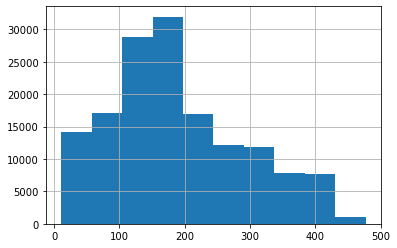

In [28]:
plot_sent_len(df2)

201.71019589627892 415.8903457428711


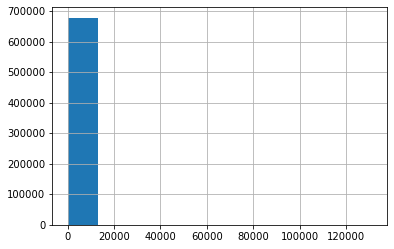

In [29]:
blog = pd.read_csv('/home/aibo/aa/aa3/datasets/full_blog.csv')
plot_sent_len(blog)

/home/aibo/env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


239.23301304589089 756.4160683456919


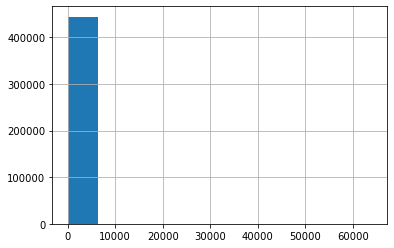

In [30]:
enron = pd.read_csv('/home/aibo/aa/aa3/datasets/full_enron.csv')
plot_sent_len(enron)

340.91633729652995 223.47583366499737


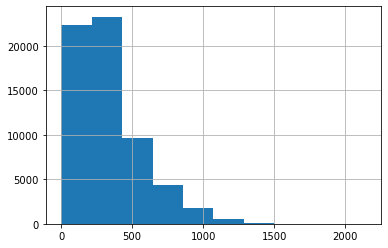

In [32]:
enron = pd.read_csv('/home/aibo/aa/aa3/datasets/full_imdb62.csv')
plot_sent_len(enron)